In [1]:
from algorithms import UCB
import numpy as np
import sys
from util.constants import JointFeatureMode

import logging
logging.basicConfig(stream=sys.stdout, format='%(asctime)s | %(name)s (%(levelname)s):\t %(message)s')

In [2]:
repitition_num = 15
regret_ucb = np.zeros((repitition_num, 5000))

## Upper Confidence Bound (baseline)

In [3]:
for rep in range(repitition_num):
    print(f"Rep no.: {rep + 1}")
    ucb = UCB(random_state=np.random.RandomState(515), joint_featured_map_mode=JointFeatureMode.KRONECKER.value)
    ucb.run()
    regret_ucb[rep] = ucb.get_regret()

Rep no.: 1
2022-10-11 19:29:16,295 | BaseAlgorithm (INFO):	 Initializing
2022-10-11 19:29:24,959 | UpperConfidenceBound (INFO):	 Initializing
2022-10-11 19:29:24,961 | UpperConfidenceBound (INFO):	 Running algorithm...
Execution time:  43.26359760001651
2022-10-11 19:30:08,227 | UpperConfidenceBound (INFO):	 Algorithm Finished...
Rep no.: 2
2022-10-11 19:30:08,227 | BaseAlgorithm (INFO):	 Initializing
2022-10-11 19:30:16,840 | UpperConfidenceBound (INFO):	 Initializing
2022-10-11 19:30:16,844 | UpperConfidenceBound (INFO):	 Running algorithm...
Execution time:  39.805674800009
2022-10-11 19:30:56,652 | UpperConfidenceBound (INFO):	 Algorithm Finished...
Rep no.: 3
2022-10-11 19:30:56,655 | BaseAlgorithm (INFO):	 Initializing
2022-10-11 19:31:03,280 | UpperConfidenceBound (INFO):	 Initializing
2022-10-11 19:31:03,282 | UpperConfidenceBound (INFO):	 Running algorithm...
Execution time:  14.476288400008343
2022-10-11 19:31:17,759 | UpperConfidenceBound (INFO):	 Algorithm Finished...
Rep n

In [8]:
# regret = ucb.get_regret().astype("float64")
regret_ucb.shape
np.savetxt('regret_ucb.txt', regret_ucb)

In [12]:
def compute_cumm_reg(regrets):
    cummulative_regrets = []
    for regret in regrets:
        cummulative_regret = [0]
        for i, value in enumerate(regret):
            cummulative_regret.append((cummulative_regret[-1] + value))
        cummulative_regrets.append(cummulative_regret)
    return cummulative_regrets[1:]

In [24]:
from util.metrics import cumulative_regret
import numpy as np
import matplotlib.pyplot as plt

cum_reg_ucb = np.array(compute_cumm_reg(regret_ucb))
cum_reg_ucb.shape

(14, 5001)

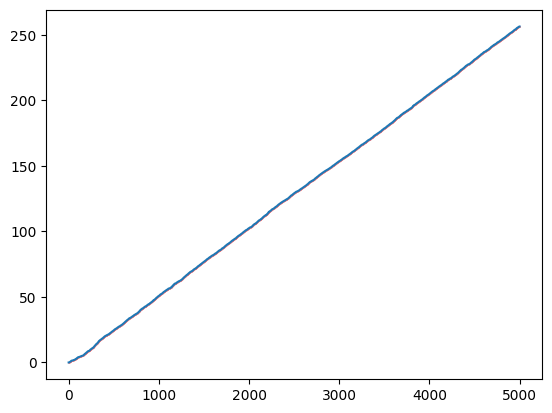

In [35]:
plt.plot(np.mean(cum_reg_ucb, axis=0))
plt.fill_between(
    range(len(cum_reg_ucb[0])), 
    np.mean(cum_reg_ucb, axis=0)-np.std(cum_reg_ucb, axis=0)/np.sqrt(len(cum_reg_ucb)), 
    np.mean(cum_reg_ucb, axis=0)+np.std(cum_reg_ucb, axis=0)/np.sqrt(len(cum_reg_ucb)), 
    color='red',
    alpha=0.5
)
plt.show()

# Testing utility code

In [2]:
from util.utility_functions import get_run_times_mips
get_run_times_mips().shape

(1499, 19)